# Análisis Exploratorio de Datos del Projecto Missing Migrants 2021

Importar librerías

In [4]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

Establecer apariencia general de gráficos

In [5]:
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_style('ticks')
#sns.set(style="ticks", font_scale=0.5)
sns.set_palette('dark')
sns.despine(offset=10, trim=True)

<Figure size 640x480 with 0 Axes>

## Extracción de datos

In [6]:
df = pd.read_csv('../data/MissingMigrants-2021.csv')

In [11]:
df.head(2)

,Unnamed: 0,Main ID,Incident ID,Region,Incident Date,Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,...,Number of Males,Number of Children,Cause of Death,Location of death,Information Source,Coordinates,Migrantion route,URL,UNSD Geographical Grouping,Source Quality
0,0,2014.MMP00001,2014.MMP00001,North America,"Mon, 01/06/2014 - 12:00",2014,January,1.0,NaN,1,...,1.0,NaN,Mixed or unknown,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",US-Mexico border crossing,http://humaneborders.info/,Northern America,5.0
1,1,2014.MMP00002,2014.MMP00002,North America,"Sun, 01/12/2014 - 12:00",2014,January,1.0,NaN,1,...,NaN,NaN,Mixed or unknown,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",US-Mexico border crossing,NaN,Northern America,5.0


## Conociendo los datos

¿Qué tipo de dato son las variables del conjunto de datos?

In [8]:
df.dtypes

Unnamed: 0                               int64
Main ID                                 object
Incident ID                             object
Region                                  object
Incident Date                           object
Year                                     int64
Reported Month                          object
Number Dead                            float64
Minimum Estimated Number of Missing    float64
Total Number of Dead and Missing         int64
Number of Survivors                    float64
Number of Females                      float64
Number of Males                        float64
Number of Children                     float64
Cause of Death                          object
Location of death                       object
Information Source                      object
Coordinates                             object
Migrantion route                        object
URL                                     object
UNSD Geographical Grouping              object
Source Qualit

¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [12]:
df.dtypes.value_counts()

object     12
float64     7
int64       3
Name: count, dtype: int64

¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [13]:
df.shape

(9906, 22)

¿Existen valores nulos explicitos en el conjunto de datos?

In [15]:
df.isnull().any()

Unnamed: 0                             False
Main ID                                False
Incident ID                            False
Region                                 False
Incident Date                           True
Year                                   False
Reported Month                         False
Number Dead                             True
Minimum Estimated Number of Missing     True
Total Number of Dead and Missing       False
Number of Survivors                     True
Number of Females                       True
Number of Males                         True
Number of Children                      True
Cause of Death                         False
Location of death                      False
Information Source                      True
Coordinates                             True
Migrantion route                        True
URL                                     True
UNSD Geographical Grouping              True
Source Quality                          True
dtype: boo

De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [16]:
df.isnull().sum().sort_values(ascending=False)

Minimum Estimated Number of Missing    8871
Number of Children                     8670
Number of Survivors                    8427
Number of Females                      8020
Number of Males                        4080
Migrantion route                       2229
URL                                    2068
Number Dead                             552
Source Quality                           42
Coordinates                              36
Information Source                       23
Incident Date                            15
UNSD Geographical Grouping                1
Total Number of Dead and Missing          0
Reported Month                            0
Main ID                                   0
Year                                      0
Cause of Death                            0
Location of death                         0
Region                                    0
Incident ID                               0
Unnamed: 0                                0
dtype: int64

¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [17]:
df.isnull().sum().sum()

43034

¿Cuál es la proporción de valores nulos por cada variable?

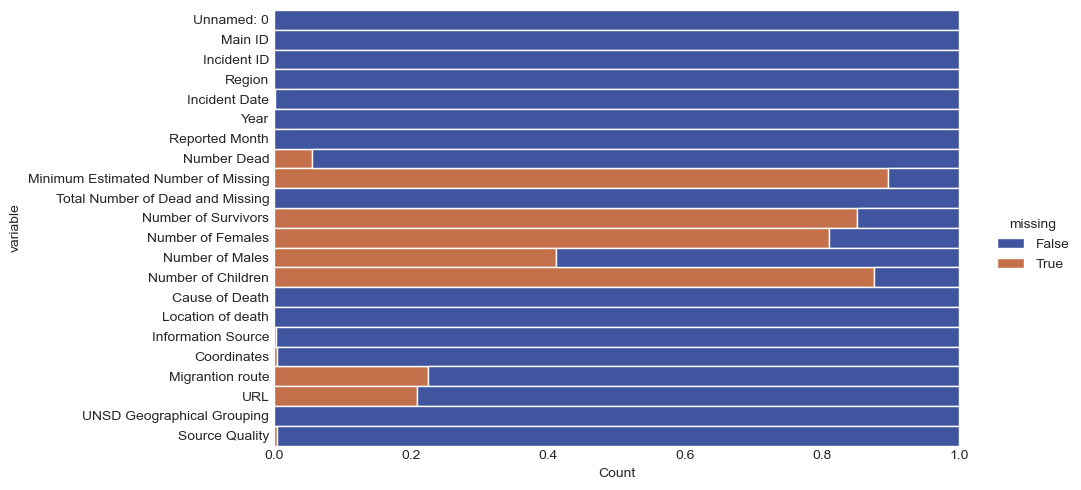

In [21]:
(
    df
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )
    )
)

¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

<Axes: >

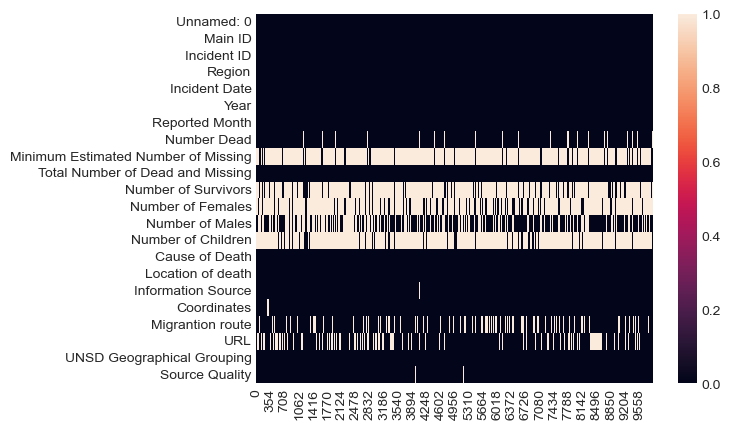

In [25]:
(
    df
    .isnull()
    .transpose()
    .pipe(
        lambda df: sns.heatmap(data=df)
    )
)

## Conteos y proporciones

### ¿Qué estadísticos describen el conjunto de datos?

Todas las variables

In [29]:
df.describe()

,Unnamed: 0,Year,Number Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Source Quality
count,9906.000000,9906.000000,9354.000000,1035.000000,9906.000000,1479.000000,1886.000000,5826.000000,1236.000000,9864.000000
mean,697.946800,2018.058449,2.700556,20.116908,4.651928,45.267072,2.594910,1.773258,2.017799,3.090633
std,447.196318,1.949933,10.499613,49.573274,21.334702,109.527894,6.313747,4.778735,7.454890,1.408142
min,0.000000,2014.000000,0.000000,-9.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,1.000000
25%,310.000000,2017.000000,1.000000,2.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.000000
50%,663.000000,2018.000000,1.000000,5.000000,1.000000,13.000000,1.000000,1.000000,1.000000,3.000000
75%,1044.750000,2020.000000,2.000000,18.000000,2.000000,42.000000,2.000000,1.000000,2.000000,4.000000
max,1817.000000,2021.000000,750.000000,750.000000,1022.000000,1950.000000,90.000000,135.000000,250.000000,5.000000


Solo las numéricas

In [32]:
df.describe(include=[np.number])

,Unnamed: 0,Year,Number Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Source Quality
count,9906.000000,9906.000000,9354.000000,1035.000000,9906.000000,1479.000000,1886.000000,5826.000000,1236.000000,9864.000000
mean,697.946800,2018.058449,2.700556,20.116908,4.651928,45.267072,2.594910,1.773258,2.017799,3.090633
std,447.196318,1.949933,10.499613,49.573274,21.334702,109.527894,6.313747,4.778735,7.454890,1.408142
min,0.000000,2014.000000,0.000000,-9.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,1.000000
25%,310.000000,2017.000000,1.000000,2.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.000000
50%,663.000000,2018.000000,1.000000,5.000000,1.000000,13.000000,1.000000,1.000000,1.000000,3.000000
75%,1044.750000,2020.000000,2.000000,18.000000,2.000000,42.000000,2.000000,1.000000,2.000000,4.000000
max,1817.000000,2021.000000,750.000000,750.000000,1022.000000,1950.000000,90.000000,135.000000,250.000000,5.000000


Solo categóricas

In [33]:
df.describe(include=object)

,Main ID,Incident ID,Region,Incident Date,Reported Month,Cause of Death,Location of death,Information Source,Coordinates,Migrantion route,URL,UNSD Geographical Grouping
count,9906,9906,9906,9891,9906,9906,9906,9883,9870,7677,7838,9905
unique,9605,9906,16,2538,12,7,5250,2758,7284,22,3971,19
top,2018.MMP00247,2014.MMP00001,North America,"Sun, 03/20/2016 - 12:00",October,Mixed or unknown,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"30.96704016, 61.82069052",US-Mexico border crossing,http://www.mixedmigration.org/4mi/,Northern America
freq,9,1,2165,27,999,2793,1062,1248,200,2638,2728,2164


### Visualizando los conteos

<Axes: xlabel='Region'>

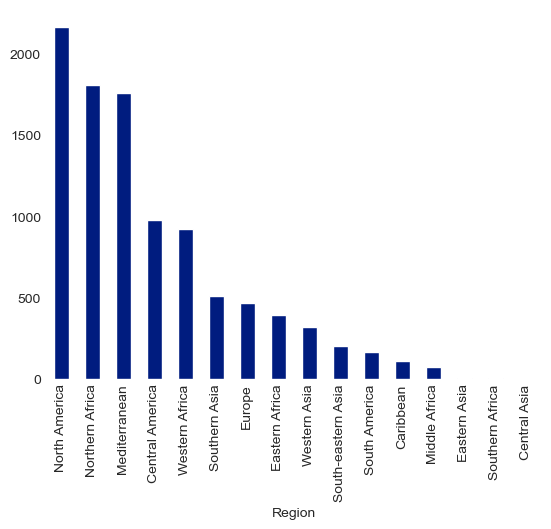

In [36]:
# Cantidad de accidentes por region
(
    df
    .Region
    .value_counts()
    .plot(
        kind='bar'
    )
)

### Visuallizando proporciones

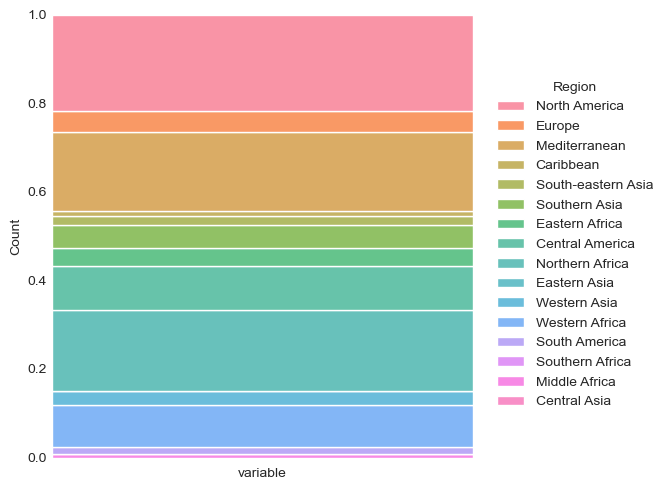

In [54]:
(
    df
    .assign(variable='')
    .pipe(
        lambda df:
            sns.displot(data=df, x='variable', hue='Region', multiple='fill')
    )
)

## Medidas estadísticas

Medidas estadísticas de fallecidos y desaparecidos por reporte

In [60]:
df['Total Number of Dead and Missing'].describe()

count    9906.000000
mean        4.651928
std        21.334702
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max      1022.000000
Name: Total Number of Dead and Missing, dtype: float64

In [87]:
# Verificaremos el rango de las demás variables
(
    df
    .select_dtypes(include=['number'])
    .quantile(q=[0.25,0.5,0.75])
    .transpose()
    .rename_axis('metricas')
    .reset_index()
    .assign(
        iqr = lambda df: df[0.75]-df[0.25]
    )
)

,metricas,0.25,0.5,0.75,iqr
0,Unnamed: 0,310.0,663.0,1044.75,734.75
1,Year,2017.0,2018.0,2020.00,3.00
2,Number Dead,1.0,1.0,2.00,1.00
3,Minimum Estimated Number of Missing,2.0,5.0,18.00,16.00
4,Total Number of Dead and Missing,1.0,1.0,2.00,1.00
5,Number of Survivors,4.0,13.0,42.00,38.00
6,Number of Females,1.0,1.0,2.00,1.00
7,Number of Males,1.0,1.0,1.00,0.00
8,Number of Children,1.0,1.0,2.00,1.00
9,Source Quality,2.0,3.0,4.00,2.00


### Distribución del total número desaparecidos y fallecidos

<Axes: xlabel='Total Number of Dead and Missing'>

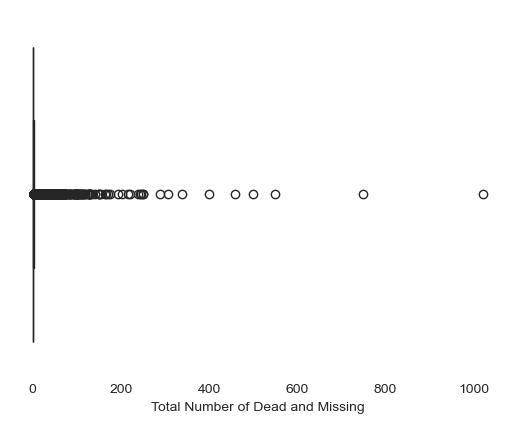

In [99]:
sns.boxplot(data=df, x='Total Number of Dead and Missing')

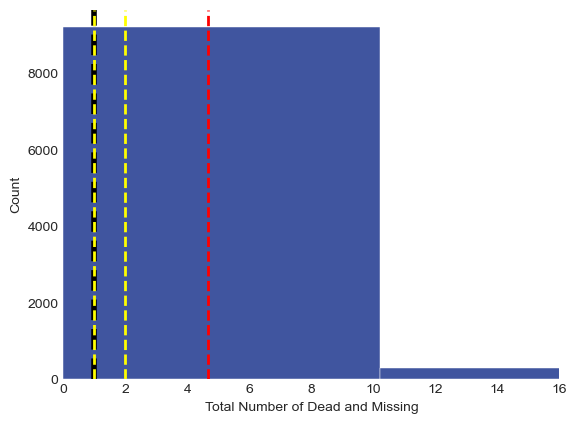

In [98]:
# Debido a que tiene muchos outliers colocaremos un límite
lower_bound = df['Total Number of Dead and Missing'].quantile(0.00)
upper_bound = df['Total Number of Dead and Missing'].quantile(0.95)

sns.histplot(
    data=df,
    x='Total Number of Dead and Missing',
    bins=100
)

plt.axvline(
    x=df['Total Number of Dead and Missing'].mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=df['Total Number of Dead and Missing'].median(),
    color='gray',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=df['Total Number of Dead and Missing'].mode().values[0],
    color='black',
    linestyle='dashed',
    linewidth=4
)

plt.axvline(
    x=df['Total Number of Dead and Missing'].quantile(0.25),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=df['Total Number of Dead and Missing'].quantile(0.75),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)
plt.xlim(lower_bound, upper_bound)  # establece el rango en el eje x
plt.show()

## PMFs, CDFs y PDFs

### Funciones de probabilidad de masas (PMFs)

In [100]:
pmf_total_missing_dead = empiricaldist.Pmf.from_seq(
    df['Total Number of Dead and Missing'],
    normalize=True
)

In [102]:
# Con esta función podemos saber la probabilidad que toque una variable discreta tome un valor, en este caso queremos
# saber la probabilidad de que haya un muerto en cada grupo que va a migración
pmf_total_missing_dead(1)

0.6470825762164345

(0.0, 16.0)

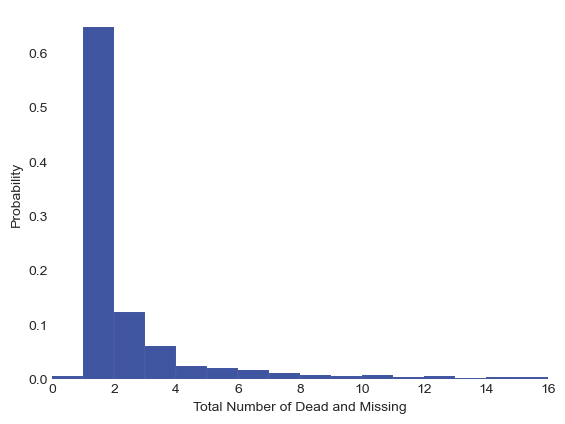

In [107]:
sns.histplot(
    data= df,
    x='Total Number of Dead and Missing',
    binwidth=1,
    stat='probability'
)
plt.xlim(df['Total Number of Dead and Missing'].quantile(q=0),df['Total Number of Dead and Missing'].quantile(q=0.95))

### Funciones empirícas de probabilidad acumulada (ECDFs)

In [109]:
cdf_total_missing_dead = empiricaldist.Cdf.from_seq(
    df['Total Number of Dead and Missing'],
    normalize=True
)

In [116]:
cdf_total_missing_dead.forward(1)
# CDF nos ayuda a saber la probabilidad menor o igual que pueda obtener una variable
# En este caso hay una probabilidad acumulada de 65% de que aya 1 fallecido o desaparecido

array(0.65202907)

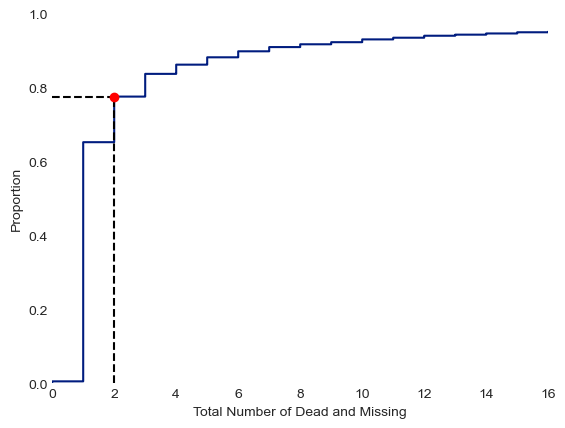

In [126]:
# Queremos saber la probabilidad acumulada de 2
q=2
p=cdf_total_missing_dead.forward(q)
sns.ecdfplot(
    data=df,
    x='Total Number of Dead and Missing'
)
plt.xlim(df['Total Number of Dead and Missing'].quantile(q=0),df['Total Number of Dead and Missing'].quantile(q=0.95))
plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    colors='black',
    linestyles='dashed'
)
plt.hlines(
    y=p,
    xmin=0,
    xmax=q,
    colors='black',
    linestyles='dashed'
)
plt.plot(q,p, 'ro')

(0.0, 16.0)

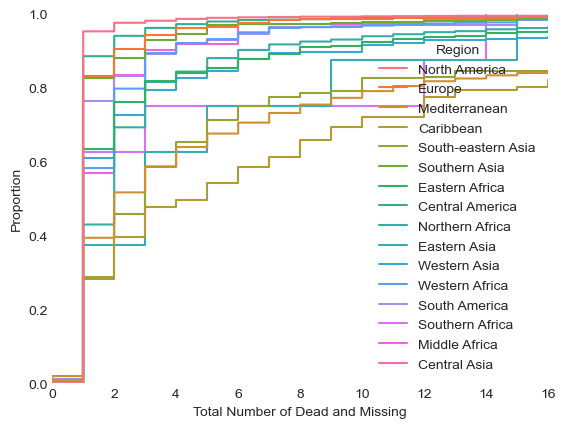

In [127]:
# Probabilidad acumulada del total de fallecidos y desaparecidos según la región
sns.ecdfplot(
    data=df,
    x='Total Number of Dead and Missing',
    hue='Region'
)
plt.xlim(df['Total Number of Dead and Missing'].quantile(q=0),df['Total Number of Dead and Missing'].quantile(q=0.95))

### Funciones de densidad de probabilidad

(0.0, 16.0)

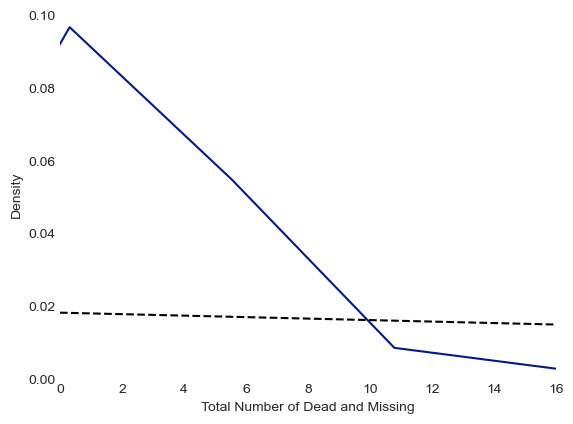

In [130]:
# Esta función nos ayuda a saber la probabilidad de que una variable continua suceda
# En este caso vemos un gráfico de densidad que no se puede visualizar muy bien por la cantidad de outliers que hay
# La linea negra indica como debería desarrollarse la tendensia normalmente, sin embargo vemos que hay una mayor densidad entre la
# cantidad 1 y 2, además vemos que la distribución esta sesgada

stats = df['Total Number of Dead and Missing'].describe()
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)
plt.plot(xs, ys, color='black', linestyle='dashed')

sns.kdeplot(
    data=df,
    x='Total Number of Dead and Missing',
)
plt.xlim(df['Total Number of Dead and Missing'].quantile(q=0),df['Total Number of Dead and Missing'].quantile(q=0.95))

## Análisis Bivariado

In [132]:
df['Number of Survivors'].fillna(0, inplace=True)

In [133]:
df.dtypes

Unnamed: 0                               int64
Main ID                                 object
Incident ID                             object
Region                                  object
Incident Date                           object
Year                                     int64
Reported Month                          object
Number Dead                            float64
Minimum Estimated Number of Missing    float64
Total Number of Dead and Missing         int64
Number of Survivors                    float64
Number of Females                      float64
Number of Males                        float64
Number of Children                     float64
Cause of Death                          object
Location of death                       object
Information Source                      object
Coordinates                             object
Migrantion route                        object
URL                                     object
UNSD Geographical Grouping              object
Source Qualit

(0.0, 16.0)

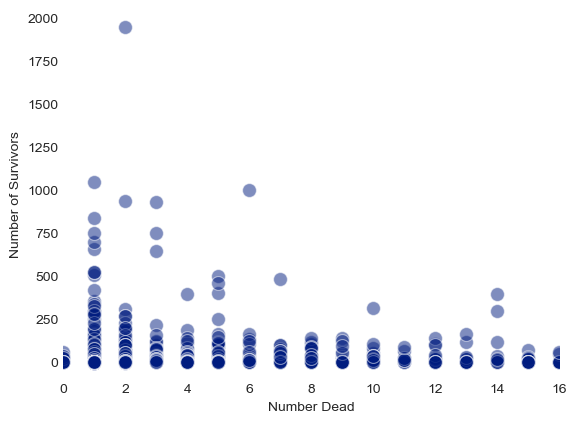

In [140]:
sns.scatterplot(
    data=df,
    x='Number Dead',
    y='Number of Survivors',
    alpha=0.5,
    s=100
)
plt.xlim(df['Total Number of Dead and Missing'].quantile(q=0),df['Total Number of Dead and Missing'].quantile(q=0.95))
# Queremos saber en que parte se concentra la relación de los número de sobrevivientes con los números de fallecidos
# En este caso no se visualzia bien con el scatterplot, asi que intentaremos con otro gráfico

(0.0, 16.0)

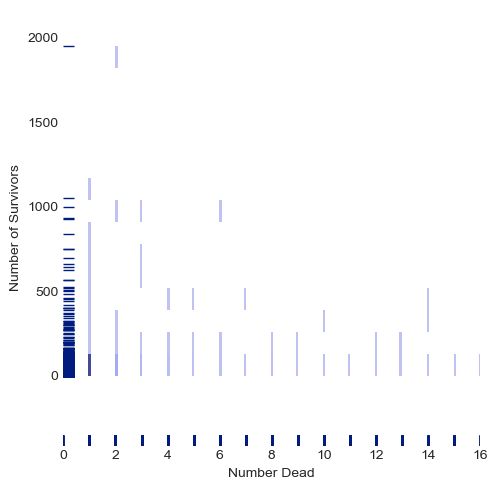

In [142]:
sns.displot(
    data=df,
    x='Number Dead',
    y='Number of Survivors',
    rug=True

)
plt.xlim(df['Total Number of Dead and Missing'].quantile(q=0),df['Total Number of Dead and Missing'].quantile(q=0.95))
# Podemos ver que hay una mayor concentración en el 1, es decir cuando fallece una persona, hay mayor cantidad de sobrevivientes

(0.0, 16.0)

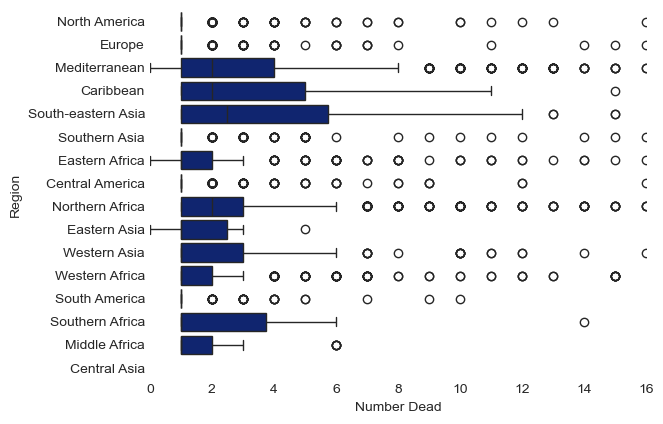

In [149]:
sns.boxplot(
    data=df,
    x='Number Dead',
    y='Region'
)
plt.xlim(df['Total Number of Dead and Missing'].quantile(q=0),df['Total Number of Dead and Missing'].quantile(q=0.95))

## Análisis multivariado

Text(0.5, 1.0, 'Matriz de Correlación')

<Figure size 800x600 with 0 Axes>

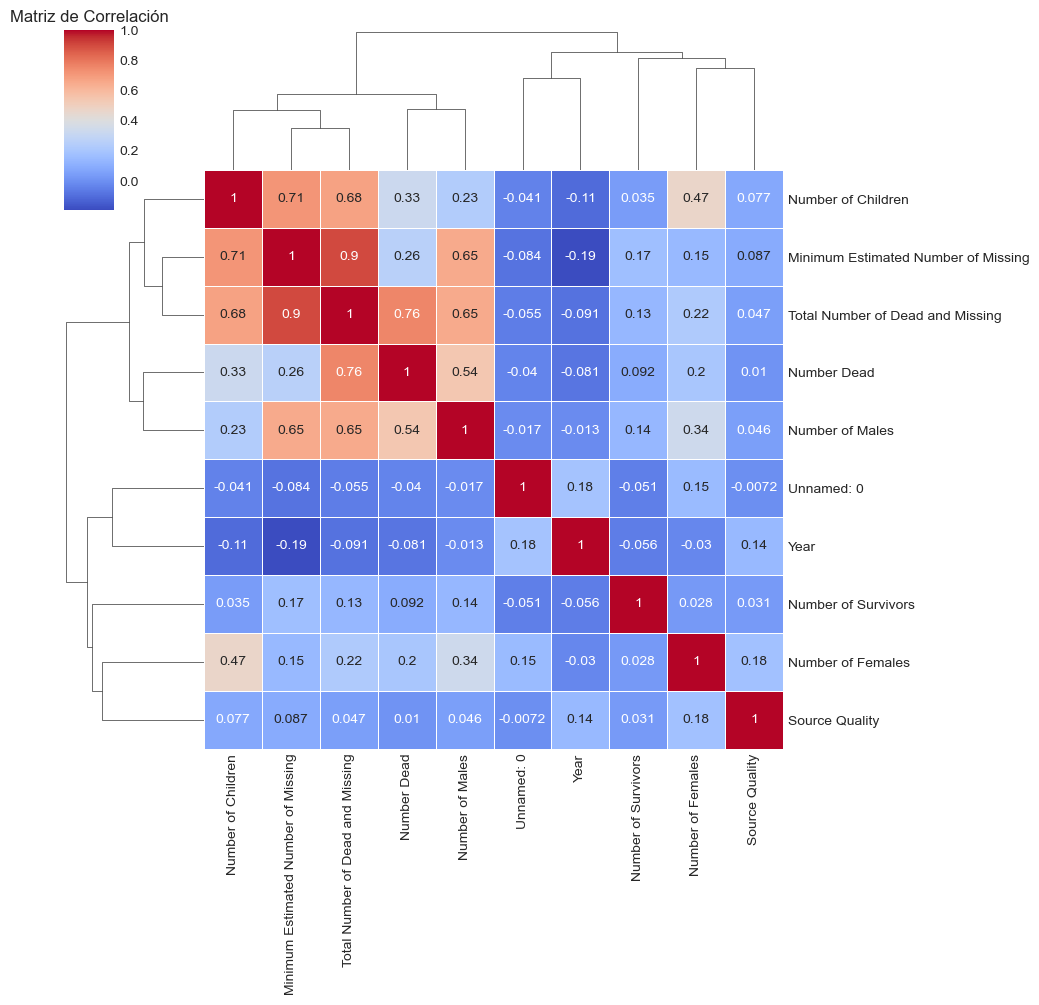

In [160]:
df_numeric = df.select_dtypes(include='number')
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(8,6))
sns.clustermap(
    correlation_matrix,
    cmap='coolwarm',
    annot=True,
    linewidths=0.5
    )
plt.title('Matriz de Correlación')

### Conclusiones

1. Number of Females y Number of Males: Hay una correlación moderada entre el número de mujeres y el número de hombres (0.336082), lo que sugiere que los dos valores están relacionados pero no perfectamente.

2. Number of Children y Minimum Estimated Number of Missing: Existe una correlación moderada entre el número de niños y el número mínimo estimado de desaparecidos (0.713075), lo que sugiere que los incidentes con un mayor número de desaparecidos tienden a involucrar a más niños.

3. Year y Number of Dead: Hay una correlación débil entre el año y el número de muertos (-0.080696), lo que indica que el número de muertos no ha variado significativamente con el tiempo.